<a href="https://colab.research.google.com/github/Nahuel-Ramirez/data-analytics/blob/main/estadistica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #Filtra los warnings

In [3]:
from google.colab import files

uploaded = files.upload()

Saving stroke.csv to stroke.csv


In [6]:
df = pd.read_csv("stroke.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
dfInfo = "El dataset tiene {} filas y {} columnas."
print(dfInfo.format(df.shape[0], df.shape[1]))

#De entrada ya sabemos que el dataset tiene 5110 filas y 12 features.

El dataset tiene 5110 filas y 12 columnas.


(5110, 12)

In [10]:
df.dtypes

#Todo lo que es Objet, es de tipo categorico. Puede ser nominal u ordinal.
#Numerico puede ser discreto o continuo

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [14]:
#Dividimos el dataset en dos partes, features numericos y categoricos:

numeric_features = df.select_dtypes(exclude = "object").columns
categorical_features = df.select_dtypes(include = "object").columns


Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

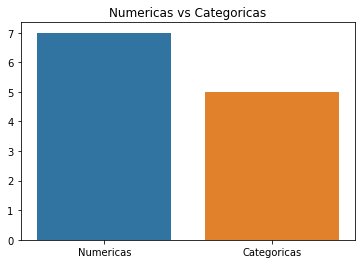

In [17]:
#Visualizar el ratio de variables numericas vs categoricas.

ax = sns.barplot(x=["Numericas", "Categoricas"], y=[numeric_features.shape[0], categorical_features.shape[0]])
ax.set_title("Numericas vs Categoricas")
plt.show()

In [18]:
#Verificar valores nulos
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [24]:
#Al haber 201 datos nulos, podemos reemplazarlo por la media en esa columna.
#Otra tecnica tambien seria reemplazar por la mediana o el rango intercuartil, ya que son medidas mas fuertes y no son sensibles a outliers.

bmiMean = df["bmi"].mean() 
print("Media bmi: ", bmiMean)
df["bmi"].fillna(bmiMean, inplace=True) #fillna() Rellena todos los datos nulos con ese valor, e inplace=True hace que se modifique el dataset.
df.isnull().sum()

Media bmi:  28.893236911794663


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [25]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [26]:
#Analizamos el genero:

df["gender"].unique() #Itera sobre todo el feature y me trae los valores unicos.

array(['Male', 'Female', 'Other'], dtype=object)

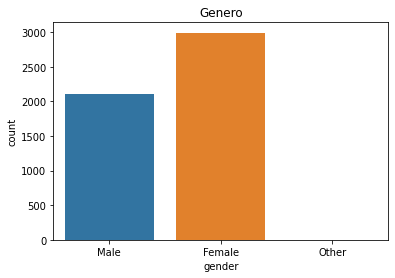

In [27]:
#Grafico de barras de los generos.
ax = sns.countplot(data=df, x="gender")
ax.set_title("Genero")
plt.show()

In [28]:
df["age"].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

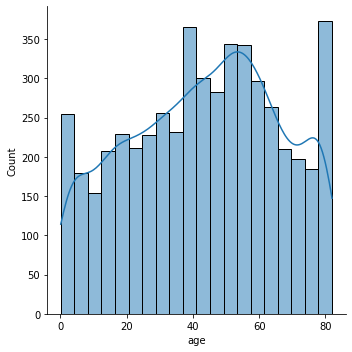

In [29]:
ax = sns.displot(data=df, x="age", kde=True) #Numerica continua

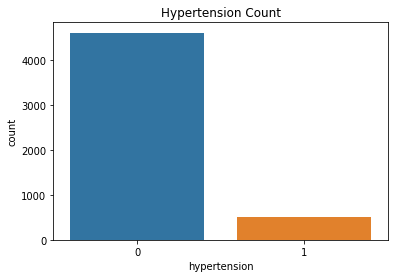

In [31]:
df["hypertension"].unique() #Numerica discreta.

ax = sns.countplot(data=df, x="hypertension")
ax.set_title("Hypertension Count")
plt.show()

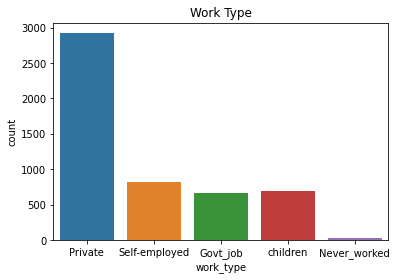

In [34]:
df["work_type"].unique() #Categorica nominal.
ax = sns.countplot(data=df, x="work_type")
ax.set_title("Work Type")
plt.show()

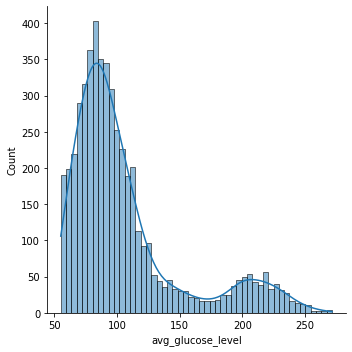

In [35]:
#Distribuciones de niveles de glucosa.

ax = sns.displot(data=df, x="avg_glucose_level", kde=True)

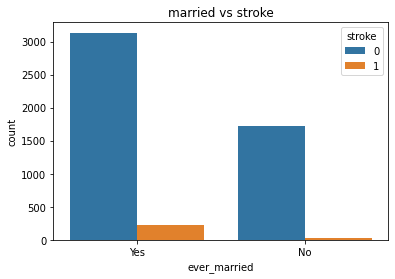

In [36]:
#Relacion entre variables.
#Relacion entre Married vs Stroke.

ax = sns.countplot(data=df, x="ever_married", hue="stroke")
ax.set_title("married vs stroke")
plt.show()

#A simple vista vemos que las personas que se casaron por lo menos una vez son mas propensos a sufrir un infarto
#Pero no podemos afirmarlo ya que debemos someter al dataset a una prueba de p-value para saber si esta relacion es estadisticamente significativa.

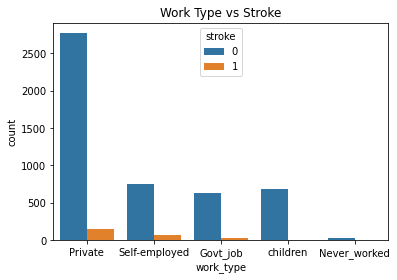

In [39]:
#Relacion tipo de trabajo vs stroke.

ax = sns.countplot(data=df, x="work_type", hue="stroke")
ax.set_title("Work Type vs Stroke")
plt.show()

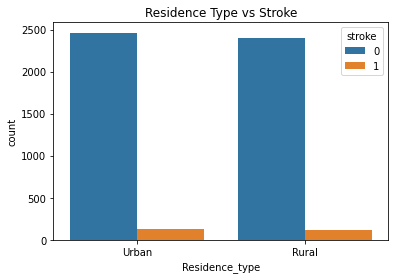

In [40]:
#Relacion tipo residencia vs stroke.

ax = sns.countplot(data=df, x="Residence_type", hue="stroke")
ax.set_title("Residence Type vs Stroke")
plt.show()

#A simple vista, solo para afianzar el concepto y sin pasar la info por un p-value para saber si es significativa
#Esto nos dice que el tipo de residencia no afecta al stroke, y no me representa nada porque tienen valores similares.
#Lo que podria hacer en estos casos seria sacar esos features de mi dataset, ya que no me aportan valor, y asi tener datos mas precisos.
#Quitaria estos features de mi dataset, porque para Machine Learning, para que voy a entrenar mi modelo con datos no significativos?

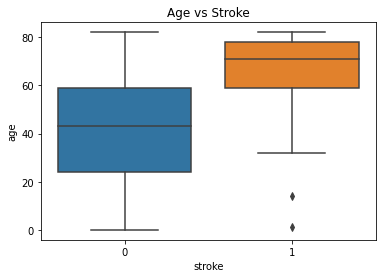

In [43]:
# Numeric features

ax = sns.boxplot(data=df, x="stroke", y="age")
ax.set_title("Age vs Stroke")
plt.show()

# El Q3 de los que NO tienen infartos coincide con el Q1 de los que si tienen infartos.
# La edad es un factor muy importante, a mayor edad mas probable los infartos.




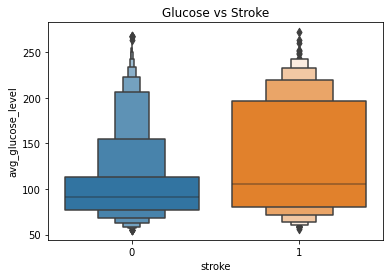

In [45]:
ax = sns.boxenplot(data=df, x="stroke", y="avg_glucose_level")
ax.set_title("Glucose vs Stroke")
plt.show()

#Cuando los graficos de caja estan tan dispares entre si, nos dice que hay una relacion directa.
# Aporta informacion, pero no podemos decir que es causante. No se puede entrenar el modelo de acuerdo a esta informacion
# Le tenemos que dar al modelo tambien la edad, sexo, etc.

